`(sudo) conda install -c anaconda pillow` or `pip3 install pillow`

In [13]:
import numpy as np, os, pandas as pd
import pickle as pkl
from os.path import isfile, join
from PIL import Image, ImageOps

[[[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [240 201 122]
  [239 200 121]
  [238 199 120]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [240 201 122]
  [239 200 121]
  [239 200 121]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [241 202 123]
  [240 201 122]
  [239 200 121]]

 ...

 [[153 122  55]
  [153 122  55]
  [153 122  55]
  ...
  [  2   2   0]
  [  2   2   0]
  [  2   2   0]]

 [[152 121  54]
  [152 121  54]
  [152 121  54]
  ...
  [  1   1   0]
  [  1   1   0]
  [  1   1   0]]

 [[151 120  53]
  [151 120  53]
  [152 121  54]
  ...
  [  1   1   0]
  [  1   1   0]
  [  1   1   0]]]


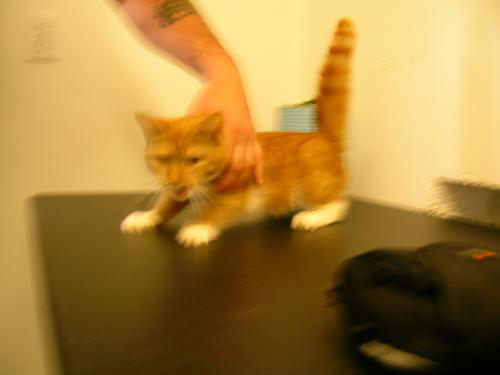

In [4]:
img = Image.open("data/kagglecatsanddogs_5340/PetImages/Cat/0.jpg")
print(np.asarray(img))
img

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [167 167 168 ... 206 205 204]
 [168 168 169 ... 208 207 206]
 [168 168 169 ... 208 207 207]]


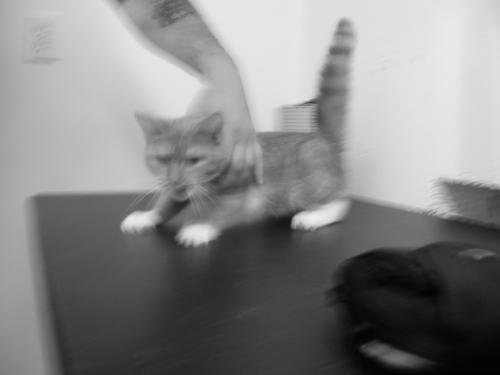

In [5]:
gray_img = ImageOps.grayscale(img)
img_arr = np.asarray(gray_img)
print(img_arr[:10])
gray_img

In [6]:
labels = []
values = []
for i in range(len(img_arr)):
    for j in range(len(img_arr[0])):
        labels.append(str(i + 1) + 'x' + str(j + 1))
        values.append(img_arr[i][j])
print(labels[:10])
print(values[:10])

['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10']
[167, 167, 168, 169, 171, 172, 173, 173, 174, 174]


In [7]:
img_paths = {"cat":"data/kagglecatsanddogs_5340/PetImages/Cat/", "dog":"data/kagglecatsanddogs_5340/PetImages/Dog/"}
bw_arrays = {"cat":[], "dog":[]}
for path_key in img_paths:
    path = img_paths[path_key]
    for fname in os.listdir(path):
        try:
            img = Image.open(join(path, fname))
            gray_img_2d = np.asarray(ImageOps.grayscale(img))
            bw_arrays[path_key].append(gray_img_2d)  
        except:
            continue    

/Users/sarahstueve/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [8]:
bw_arrays['cat'][0]

array([[174, 175, 177, ..., 134, 133, 132],
       [175, 176, 178, ..., 135, 134, 132],
       [177, 178, 179, ..., 137, 136, 134],
       ...,
       [ 56,  55,  58, ..., 168, 165, 174],
       [ 57,  56,  58, ..., 157, 150, 153],
       [ 58,  56,  58, ..., 156, 143, 139]], dtype=uint8)

In [10]:
data = []
labels = []
for key in bw_arrays:
    for img_arr in bw_arrays[key]:
        data.append(img_arr.flatten())
        if key == "cat":
            labels.append(0)
        elif key == "dog":
            labels.append(1)
data[:10]

[array([174, 175, 177, ..., 156, 143, 139], dtype=uint8),
 array([74, 73, 72, ..., 37, 39, 41], dtype=uint8),
 array([ 84,  84,  84, ..., 160, 156, 155], dtype=uint8),
 array([109, 112, 113, ..., 247, 253, 251], dtype=uint8),
 array([ 45,  46,  46, ..., 141, 109,  53], dtype=uint8),
 array([172, 172, 172, ...,  88,  92,  83], dtype=uint8),
 array([149, 151, 149, ..., 203, 204, 204], dtype=uint8),
 array([168, 169, 170, ...,  79,  81,  82], dtype=uint8),
 array([131, 131, 131, ...,  86,  78,  78], dtype=uint8),
 array([ 72,  65,  60, ..., 105, 113, 120], dtype=uint8)]

In [11]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
len(data[0])

182500

In [16]:
x_file = open("data/cats_and_dogs_bw_flat.pkl", "wb")
y_file = open("data/cats_and_dogs_labels.pkl", "wb")
pkl.dump(data, file = x_file)
pkl.dump(labels, file = y_file)
x_file.close()
y_file.close()